<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab: Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data), and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data)
2. Setup X and y (feature matrix and target vector).
3. Split X and y into train and test subsets.
4. Preprocess your data:

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix.
   
5. Create your network:
   - Remember that for multi-class classification you need a softmax activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Train your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaining the activation functions on the hidden layers, etc.
8. Load in [Kaggle's](https://www.kaggle.com/c/digit-recognizer/data) `test.csv`.
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for **_at least_** two of the four **"configurations"**:

1. Using a `tensorflow` network
2. Using a `keras` convolutional network
3. Using a `keras` network with regularization
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

In [4]:
# import modules
import pandas as pd
import numpy as np
from  sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten

np.random.seed(42) # set seed

In [5]:
# load training data
train_df = pd.read_csv('data/train.csv')

# load testing data
test_df = pd.read_csv('data/test.csv')

In [6]:
# setup features and target
X = train_df.drop(columns=['label'])
y = train_df['label']

In [7]:
# check null value
train_df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [8]:
# check null value
test_df.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [9]:
# encode y values
ec = OneHotEncoder(sparse_output=False)
y_ec = ec.fit_transform(y.values.reshape(-1,1))

In [10]:
# split for X and y into train and test data
X_train, X_dev, y_train, y_dev = train_test_split(X / 255.0, y_ec, train_size=0.8, stratify=y_ec)

#### Model 1 Feedforward Neural Network 

In [12]:
# initalize model
model = Sequential([Input(shape=(784,)),
                   Dense(256, activation='relu', kernel_regularizer='l2'),
                   Dropout(0.2),
                   Dense(128, activation='relu'),
                   Dense(10, activation='softmax')
                   ])

# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

In [13]:
# train the model
hist = model.fit(X_train,
                 y_train,
                 batch_size=32,
                 epochs=10,
                 validation_data=(X_dev, y_dev)
                )

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8334 - loss: 1.4065 - val_accuracy: 0.9337 - val_loss: 0.4032
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9203 - loss: 0.4418 - val_accuracy: 0.9257 - val_loss: 0.4322
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9297 - loss: 0.4044 - val_accuracy: 0.9345 - val_loss: 0.3909
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9333 - loss: 0.3885 - val_accuracy: 0.9486 - val_loss: 0.3442
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9386 - loss: 0.3663 - val_accuracy: 0.9569 - val_loss: 0.3132
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9391 - loss: 0.3605 - val_accuracy: 0.9570 - val_loss: 0.3072
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9374 - loss: 0.3609 - val_accuracy: 0.9569 - val_loss: 0.3110
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9406 - loss: 0.3470 -

In [14]:
# run prediction 
X_test = test_df.values / 255.0
preds = model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [16]:
# get index from max value
pred_labels = np.argmax(preds, axis=1)
pred_labels

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [17]:
submit_df = pd.DataFrame({'ImageId': range(1, len(pred_labels) + 1), 'Label': pred_labels})
submit_df.to_csv('data/submission1.csv', index=False)

#### Model 2 Convolutional Neural Network

In [19]:
X_train.values.shape

(33600, 784)

In [20]:
X_train.values.reshape(-1,28,28,1).shape

(33600, 28, 28, 1)

In [21]:
# initalize model
model = Sequential([
                    Input(shape=(28,28,1)),
                    Conv2D(filters=30, kernel_size=(3, 3), strides=2, activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
                   ])

# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

In [22]:
# train the model
hist = model.fit(X_train.values.reshape(-1,28,28,1),
                 y_train,
                 batch_size=32,
                 epochs=10,
                 validation_data=(X_dev.values.reshape(-1,28,28,1), y_dev)
                )

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8337 - loss: 0.5674 - val_accuracy: 0.9590 - val_loss: 0.1388
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9649 - loss: 0.1151 - val_accuracy: 0.9681 - val_loss: 0.0964
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9747 - loss: 0.0797 - val_accuracy: 0.9767 - val_loss: 0.0749
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9824 - loss: 0.0571 - val_accuracy: 0.9767 - val_loss: 0.0755
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9866 - loss: 0.0449 - val_accuracy: 0.9814 - val_loss: 0.0623
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9890 - loss: 0.0370 - val_accuracy: 0.9817 - val_loss: 0.0611
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9910 - loss: 0.0280 - val_accuracy: 0.9800 - val_loss: 0.0619
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9938 - loss: 0.0213 -

In [23]:
# run prediction 
X_test = test_df.values.reshape(-1,28,28,1) / 255.0
preds = model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [24]:
# get index from max value
pred_labels = np.argmax(preds, axis=1)
pred_labels

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [25]:
submit_df = pd.DataFrame({'ImageId': range(1, len(pred_labels) + 1), 'Label': pred_labels})
submit_df.to_csv('data/submission2.csv', index=False)

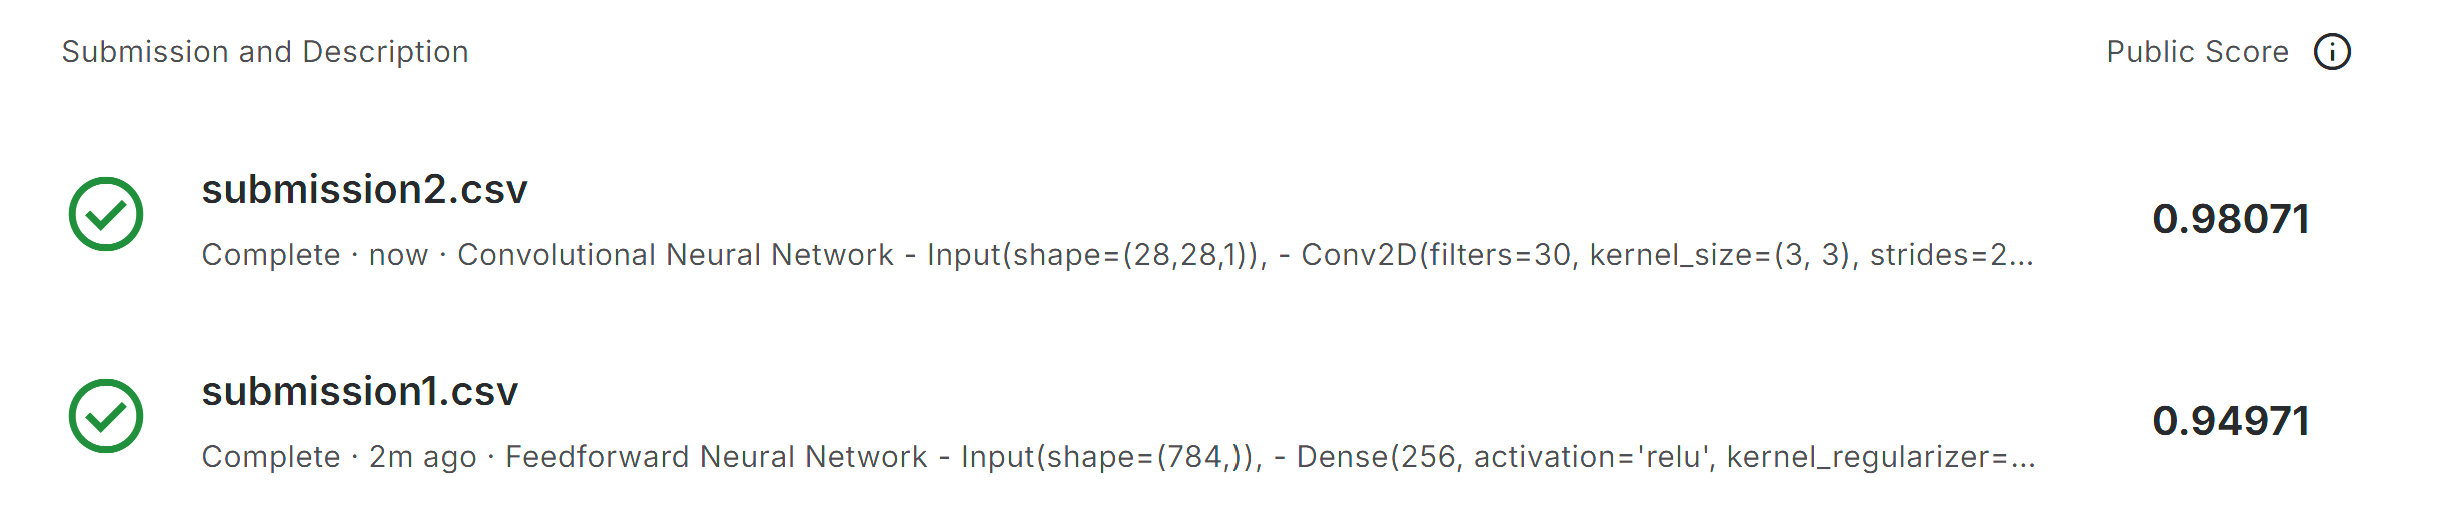